## Simulating observations with MUSTANG-2

MUSTANG-2 is a bolometric array on the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope). In this notebook we simulate an observation of a galactic cluster.

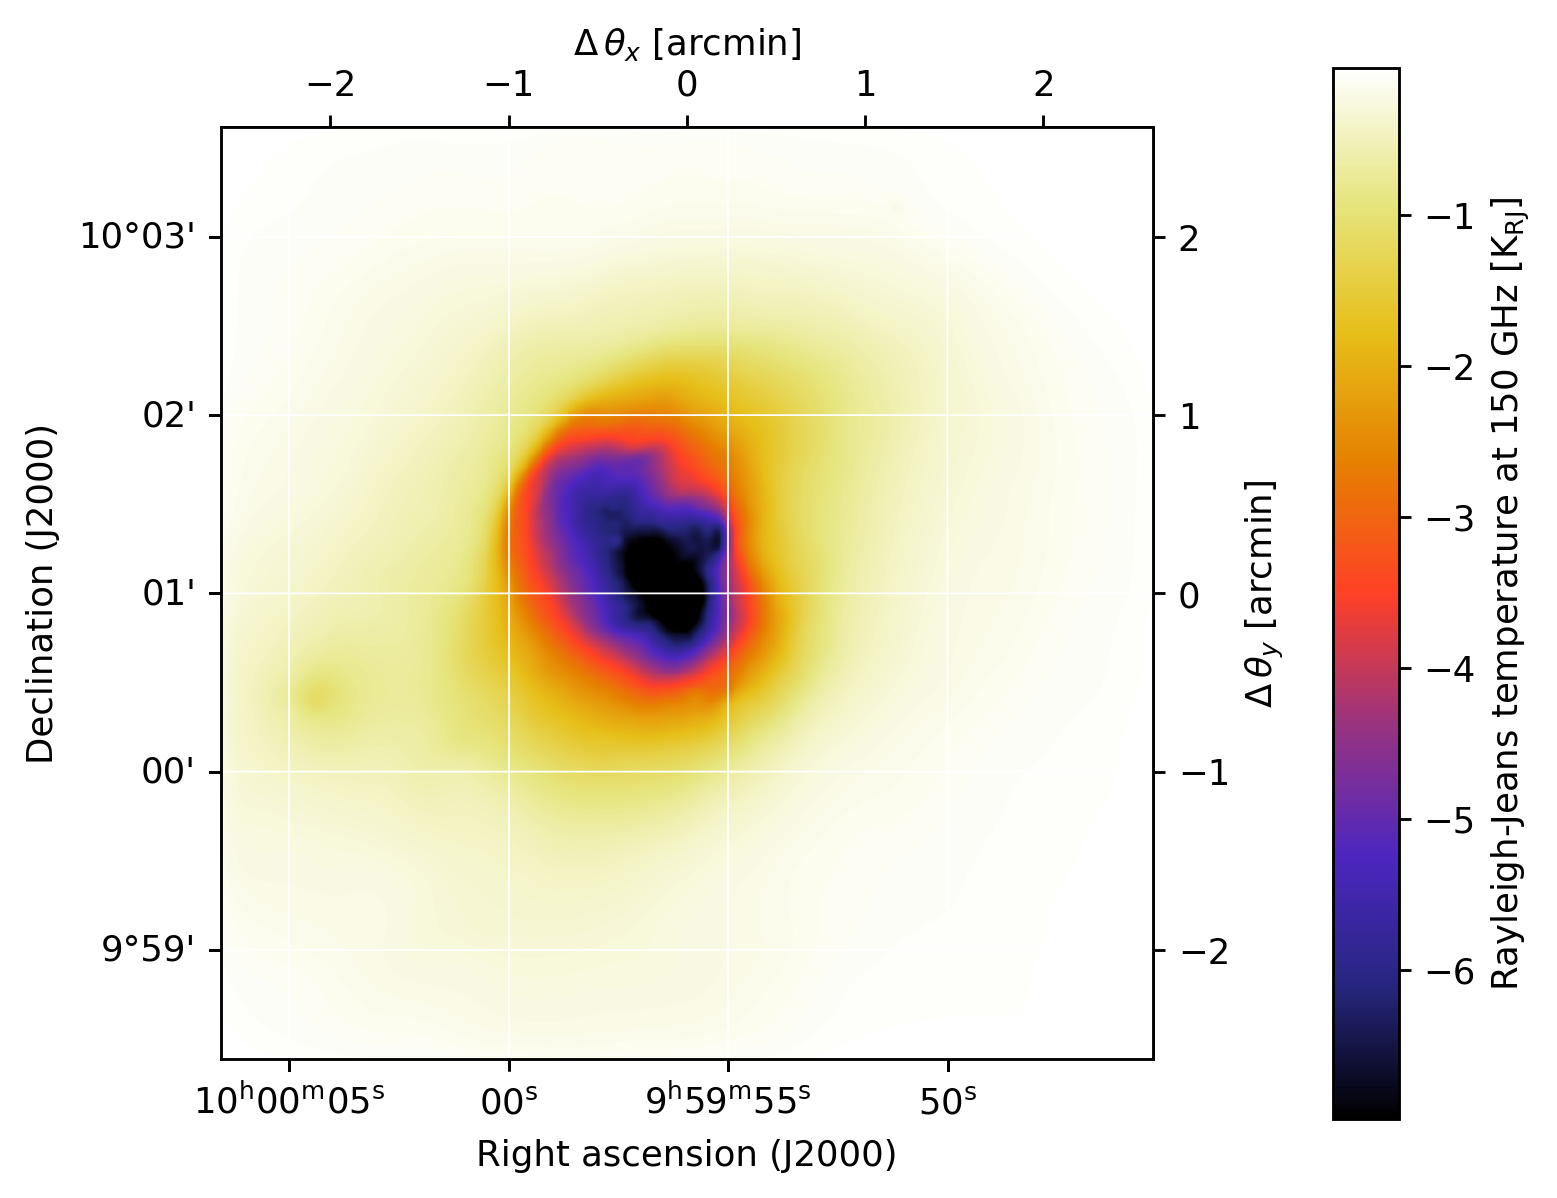

In [1]:
import maria

map_filename = maria.io.fetch("maps/cluster.fits")

# load in the map from a fits file
input_map = maria.map.load(
    nu=150e9,
    filename=map_filename,  # filename
    resolution=8.714e-05,  # pixel size in degrees
    center=(150, 10),  # position in the sky
    units="Jy/pixel",  # Units of the input map
)

input_map.data *= 1e1
input_map.to(units="uK_RJ").plot()

### Observing strategy
Below we define the observing strategy containing the duration, integration time, read out rate, and pointing center

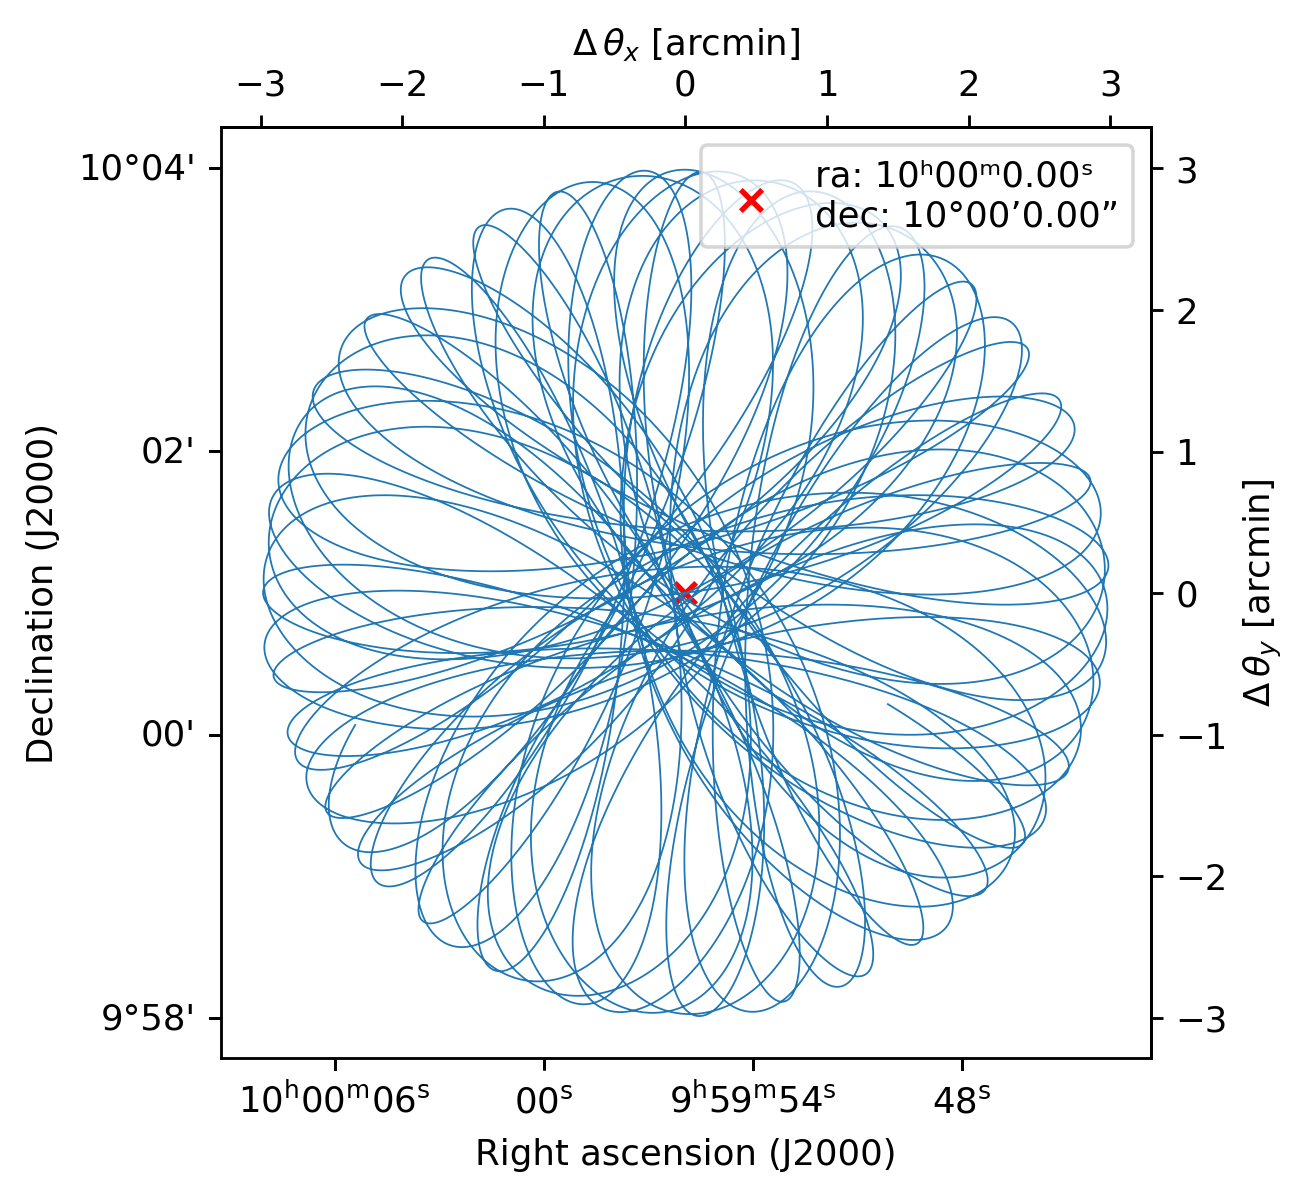

In [2]:
# load the map into maria
plan = maria.get_plan(
    scan_pattern="daisy",  # scanning pattern
    scan_options={"radius": 0.05, "speed": 0.01},  # in degrees
    duration=1200,  # integration time in seconds
    sample_rate=50,  # in Hz
    scan_center=(150, 10),  # position in the sky
    frame="ra_dec",
)

plan.plot()

### Define instrument
We have configuration files in place to mimic typical telescopes and instruments. To run a MUSTANG-2 like observations, simply initialize the instrument as follows. Other tutorials will go into more detail on how to adjust it to test out how telescope designs affect the recovered signal. 

In [3]:
instrument = maria.get_instrument("MUSTANG-2")

We can plot the instruments which will show the location of the ArrayList in the FoV with their diffrection limited beam size. The ArrayList for MUSTANG-2 are spaced at 2 f-lambda.

Instrument(1 array)
├ arrays:
│            n         FOV baseline      bands
│  array1  217  4.2 arcmin      0 m  [m2/f093]
│ 
└ bands:
               center      width    η      NEP      NET_RJ     NET_CMB  \
   m2/f093  86.21 GHz  20.98 GHz  0.1  30 aW√s  1.142 mK√s  1.381 mK√s   
   
                    FWHM  
   m2/f093  9.133 arcsec  


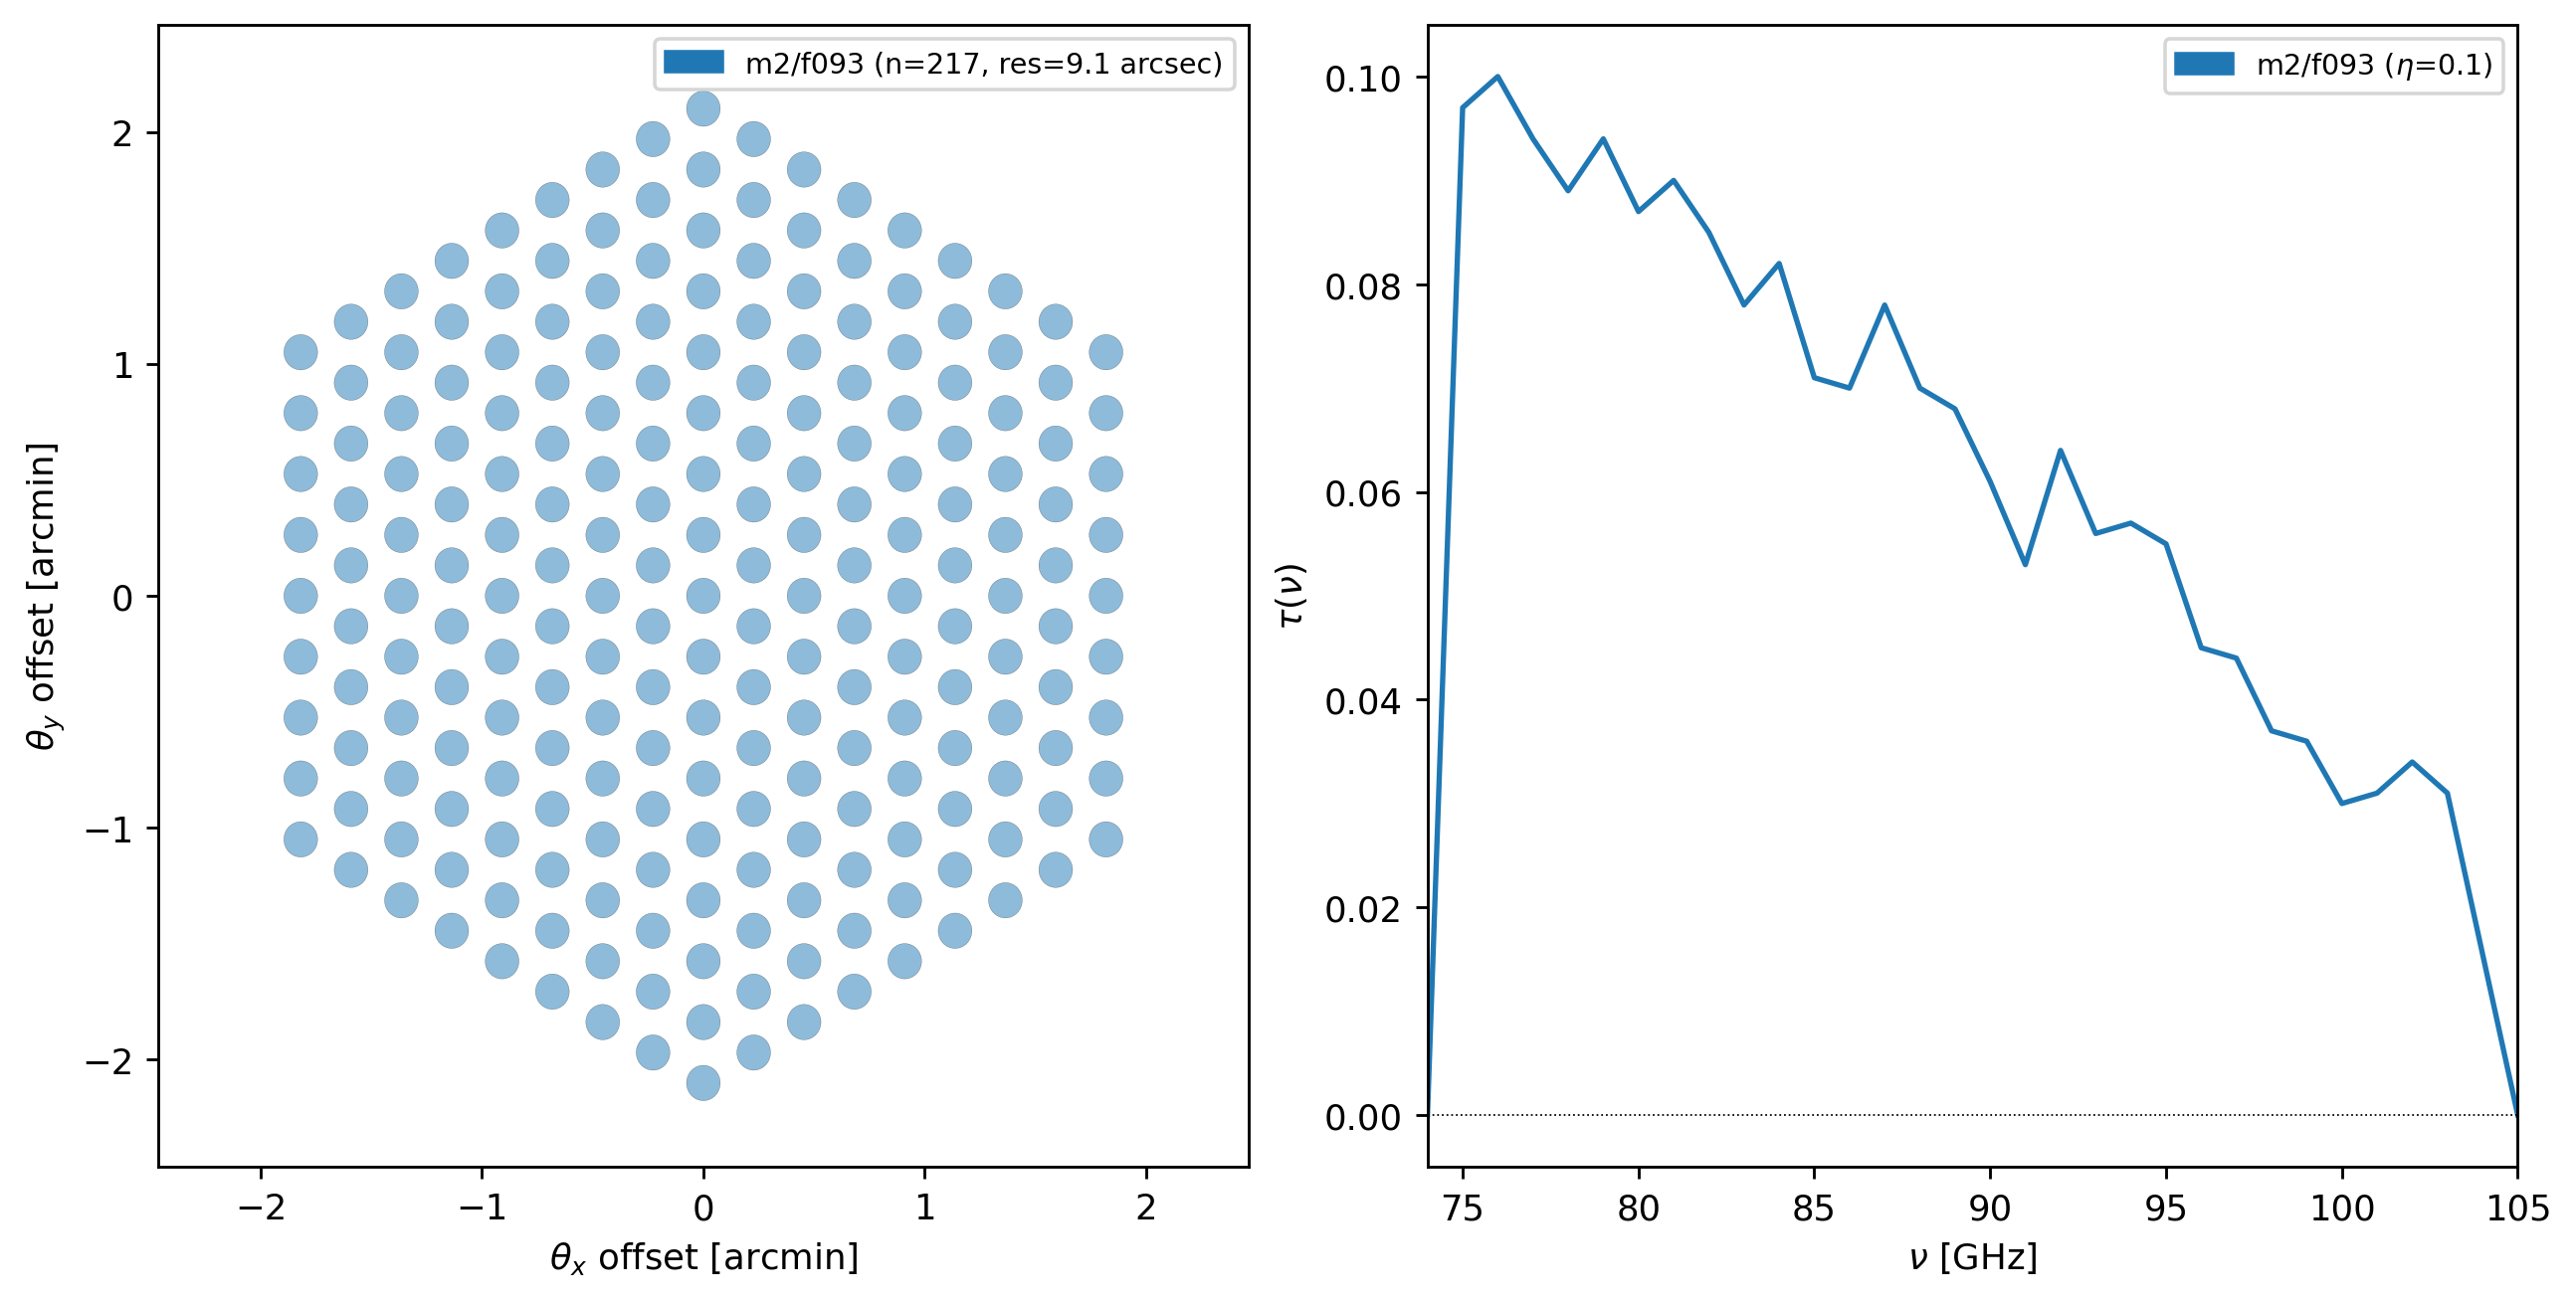

In [4]:
print(instrument)
instrument.plot()

### Initialize the simulation
The simulation class combines all the components into one.

In [5]:
sim = maria.Simulation(
    instrument,
    plan=plan,
    site="green_bank",
    map=input_map,
    atmosphere="2d",
)

print(sim)

Constructing atmosphere:   0%|          | 0/6 [00:00<?, ?it/s]

Constructing atmosphere:  17%|█▋        | 1/6 [00:01<00:06,  1.38s/it]

Constructing atmosphere:  33%|███▎      | 2/6 [00:02<00:05,  1.41s/it]

Constructing atmosphere:  50%|█████     | 3/6 [00:04<00:04,  1.37s/it]

Constructing atmosphere:  67%|██████▋   | 4/6 [00:05<00:02,  1.37s/it]

Constructing atmosphere:  83%|████████▎ | 5/6 [00:06<00:01,  1.36s/it]

Constructing atmosphere: 100%|██████████| 6/6 [00:08<00:00,  1.39s/it]

Constructing atmosphere: 100%|██████████| 6/6 [00:08<00:00,  1.38s/it]

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n         FOV baseline      bands
│ │  array1  217  4.2 arcmin      0 m  [m2/f093]
│ │ 
│ └ bands:
│                center      width    η      NEP      NET_RJ     NET_CMB  \
│    m2/f093  86.21 GHz  20.98 GHz  0.1  30 aW√s  1.142 mK√s  1.381 mK√s   
│    
│                     FWHM  
│    m2/f093  9.133 arcsec  
├ Site:
│   region: green_bank
│   location: 38°25’59.16”N 79°50’23.28”W
│   altitude: 0.825 km
│   seasonal: True
│   diurnal: True
├ Plan:
│   start_time: 2024-02-10 06:00:00.000 +00:00
│   duration: 1200 s
│   sample_rate: 50 Hz
│   center:
│     ra: 10ʰ00ᵐ0.00ˢ
│     dec: 10°00’0.00”
│   scan_pattern: daisy
│   scan_radius: 5.999 arcmin
│   scan_kwargs: {'radius': 0.05, 'speed': 0.01}
├ Atmosphere(6 processes with 6 layers):
│ ├ spectrum:
│ │   region: green_bank
│ └ weather:
│     region: green_bank
│     altitude: 0.825 km
│     time: Feb 10 01:09:59 -05:00
│     pwv[mean, rms]: (8.097 mm, 242.9 um)
└ ProjectedM

### Obtaining time-ordered data (TODs)
To acquire time-ordered data (TODs), you only need to run the script. The TOD object contains time stamps, coordinates (in RA and Dec), and the intensity of each scan for every detector. The intensity units are expressed in power can be converted to surface brightness temperature units: Kelvin Rayleigh-Jeans (Even if the input map is given in Jy/pixel. We convert the units under the hood).

In [6]:
tod = sim.run()

Generating turbulence:   0%|          | 0/6 [00:00<?, ?it/s]

Generating turbulence:  67%|██████▋   | 4/6 [00:00<00:00, 34.08it/s]

Generating turbulence: 100%|██████████| 6/6 [00:00<00:00, 28.98it/s]

Sampling turbulence:   0%|          | 0/6 [00:00<?, ?it/s]

Sampling turbulence:  17%|█▋        | 1/6 [00:00<00:01,  3.26it/s]

Sampling turbulence:  33%|███▎      | 2/6 [00:00<00:01,  3.27it/s]

Sampling turbulence:  50%|█████     | 3/6 [00:00<00:00,  3.38it/s]

Sampling turbulence:  67%|██████▋   | 4/6 [00:01<00:00,  3.37it/s]

Sampling turbulence:  83%|████████▎ | 5/6 [00:01<00:00,  3.32it/s]

Sampling turbulence: 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

Sampling turbulence: 100%|██████████| 6/6 [00:01<00:00,  3.35it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it, band=m2/f093]

Computing atmospheric emission: 100%|██████████| 1/1 [00:02<00:00,  2.65s/it, band=m2/f093]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s]

Sampling map:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Sampling map: 100%|██████████| 1/1 [00:04<00:00,  4.57s/it, band=m2/f093]

Sampling map: 100%|██████████| 1/1 [00:04<00:00,  4.57s/it, band=m2/f093]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|          | 0/1 [00:00<?, ?it/s, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it, band=m2/f093]

Generating noise: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it, band=m2/f093]

### Useful visualizations:

Now, let's visualize the TODS. The figure shows the mean powerspectra and a time series of the observations.

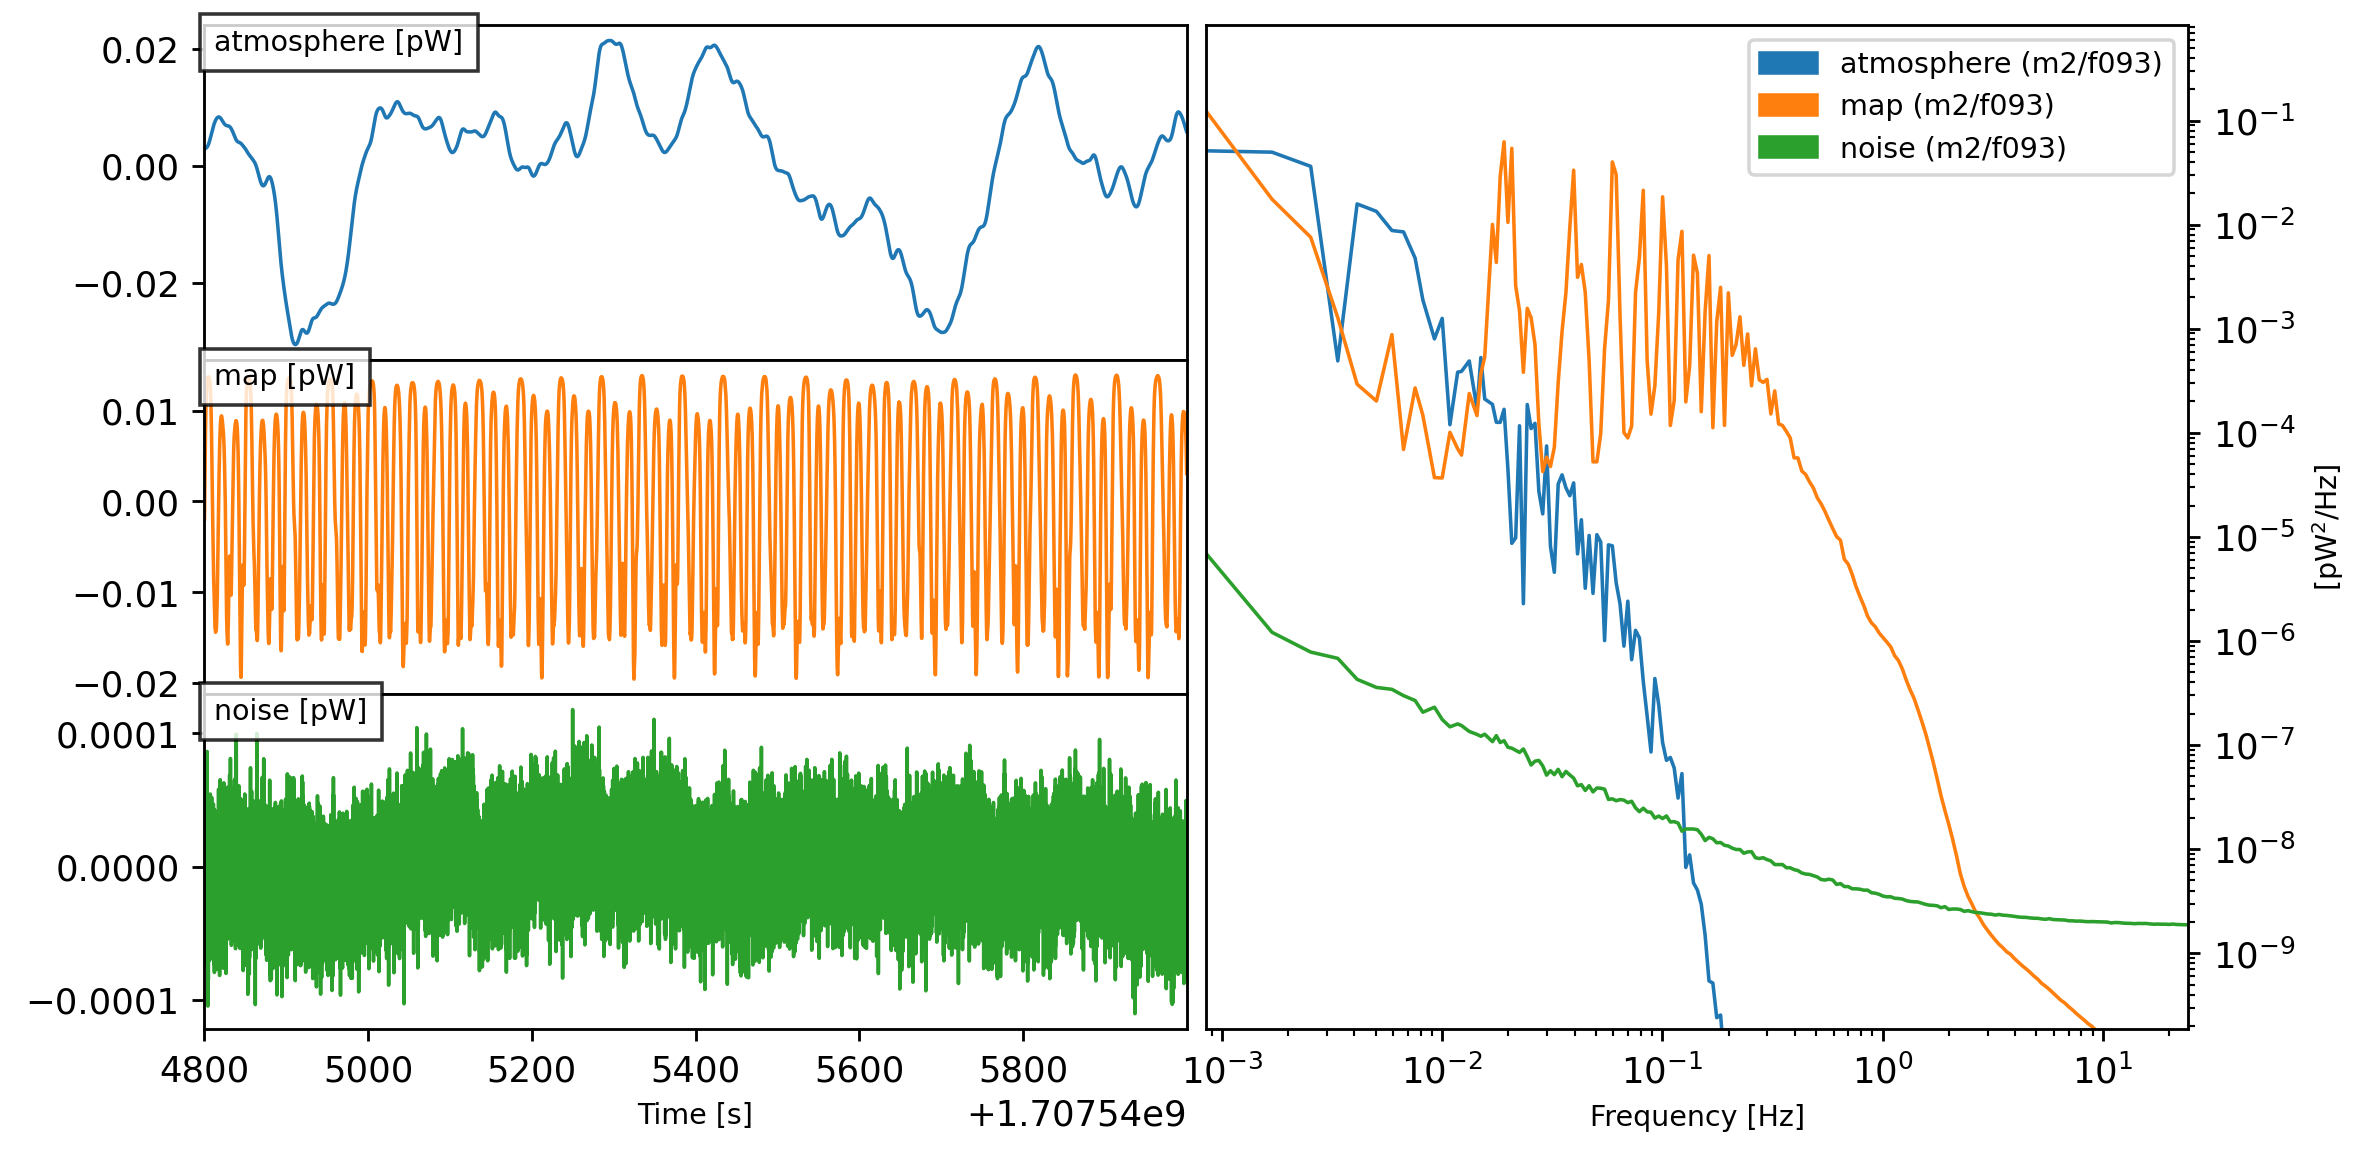

In [7]:
tod.plot()

### Mapping the TODs
To transform the TODs into images, you'll require a mapper. While there is an option to use your own mapper, we have also implemented one for your convenience. This built-in mapper follows a straightforward approach: it removes the common mode over all ArrayList (the atmosphere if you scan fast enough), then detrends and optionally Fourier filters the time-streams to remove any noise smaller than the resolution of the dish. Then, the mapper bins the TOD on the specified grid. Notably, the mapper is designed to effectively eliminate correlated atmospheric noise among different scans, thereby increasing SNR of the output map.

An example of how to run the mapper on the TOD is as follows:

In [8]:
from maria.mappers import BinMapper

mapper = BinMapper(
    center=(150, 10),
    frame="ra_dec",
    width=0.1,
    height=0.1,
    resolution=2e-4,
    tod_preprocessing={
        "window": {"name": "hamming"},
        "remove_modes": {"modes_to_remove": [0]},
        "remove_spline": {"knot_spacing": 10},
    },
    map_postprocessing={
        "gaussian_filter": {"sigma": 1},
        "median_filter": {"size": 1},
    },
    units="uK_RJ",
)

mapper.add_tods(tod)
output_map = mapper.run()

2025-04-22 03:01:41.708 INFO: Ran mapper for band m2/f093 in 13.94 s.


### Visualizing the maps
As interesting as the detector setup, power spectra, and time series are, intuitively we think in the image plane. so let's visualize it! 

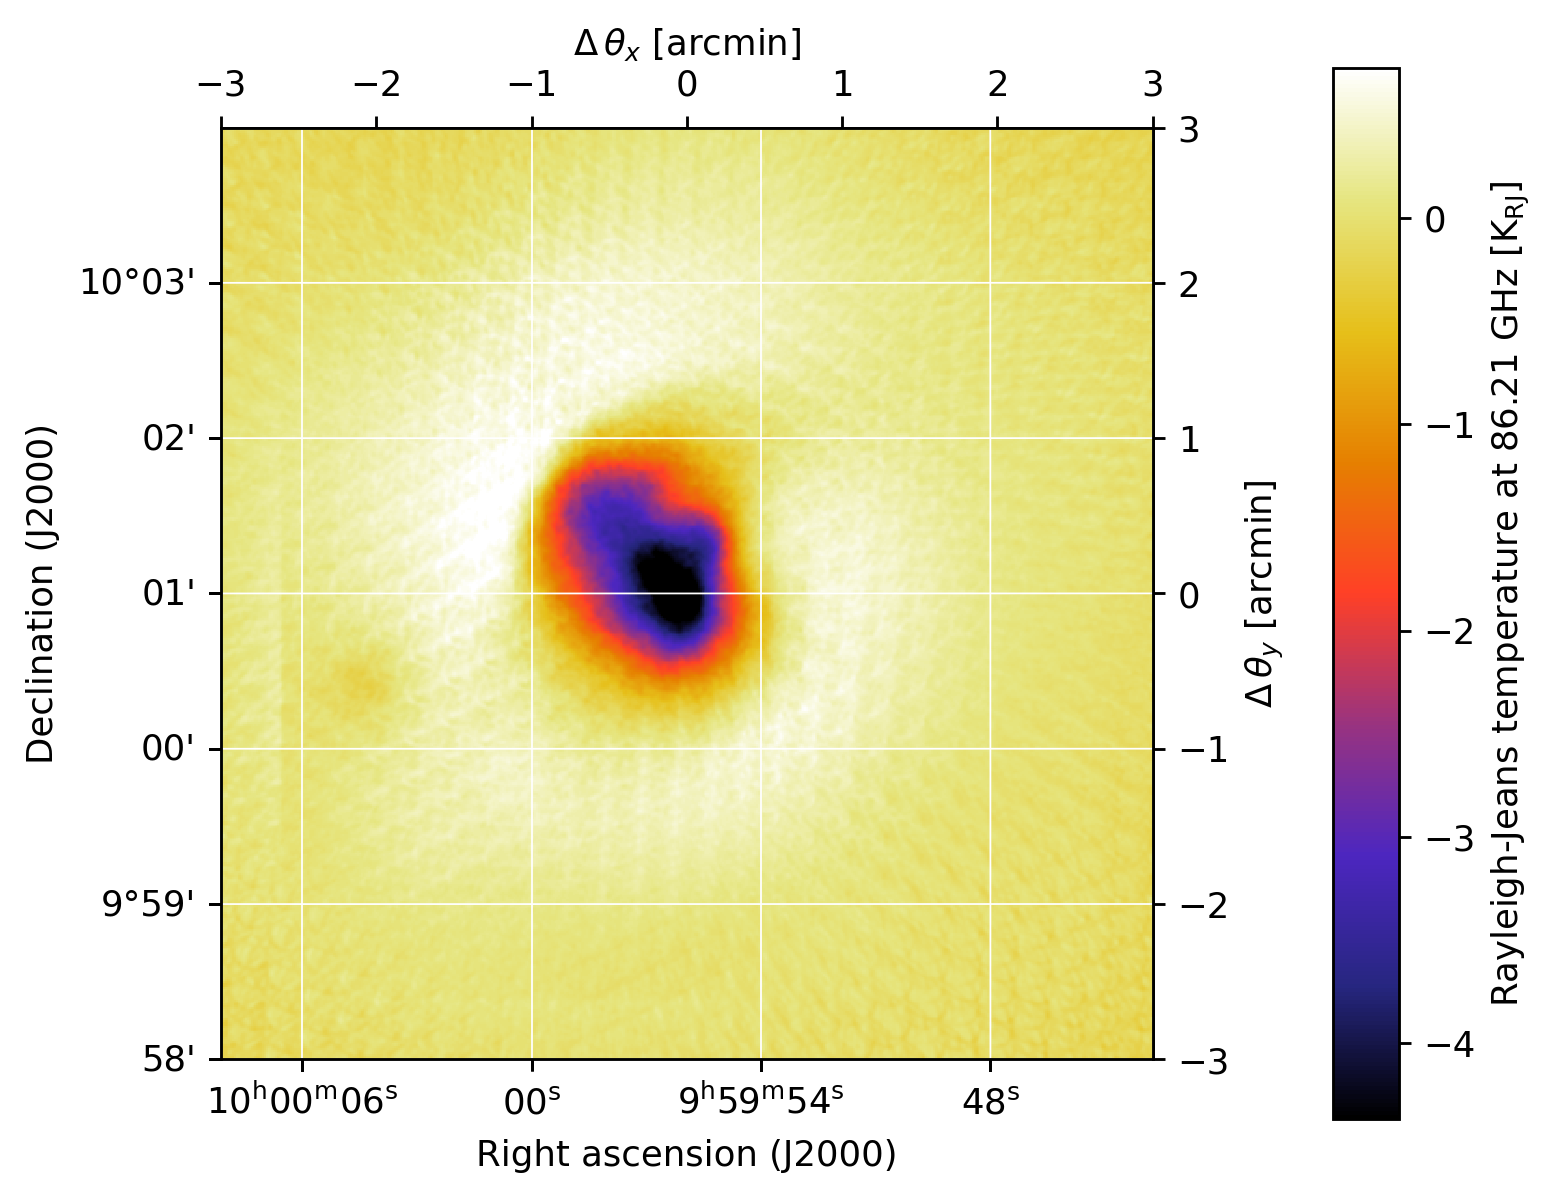

In [9]:
output_map.plot()

You can also save the map to a fits file. Here, we recover the units in which the map was initially specified in.

In [10]:
output_map.to_fits("/tmp/simulated_map.fits")